# Climb Gradient

For FAR 23 airplanes, it is required to satisfy certain climb gradient requirement as outlined in CFR [Part 23.2120](https://www.ecfr.gov/current/title-14/chapter-I/subchapter-C/part-23/subpart-B/subject-group-ECFR0f27e01839859ea/section-23.2120). The example airplane consists of twin engine and needs to be certified for level 2 and low speed performance. This leads to three climb gradient requirements under different scenarios:

1. All engines operating (AEO): minimum climb gradient of 8.3% with landing gear retracted, flaps in takeoff position, and both engines at maximum continous power
2. One engine inoperative (OEI): minimum climb gradient of 1.5% at 5000 ft altitude with landing gear and flaps retracted, and remaining engine at takeoff power
3. Blaked Landing (BL): minimum climb gradient of 3% with landing gear extended, flaps in landing position, and both engines at takeoff power

The methods outlined in Section 3.3 in Roskam Part 1 are used to identify feasbile values of $W/S$ and $W/P$. The climb gradient (CGR) requirement can be linked to climb gradient parameter (CGRP) using

$$
    \text{CGRP} = \frac{\text{CGR} + (L/D)^{-1}}{\sqrt{C_L}},
$$

where CGRP is defined as

$$
    CGRP = \frac{18.97 \eta_p \sqrt{\sigma} }{ W/P \sqrt{W/S} }.
$$

> **_NOTE_:** In the above equations, for a given climb gradient requirement, the value of the quantities should be at the respective configuration. For example, the value of L/D, $C_L$, $W/P$ and $W/S$ should be in landing configuration while computing blaked landing requirement.

The best possible climb gradient occurs when $C_L$ is close to its maximum value. This can be dangerous since the aircraft will be flying close to stall speed, and hence, a margin of 0.2 is used as recommended in Roskam Part 1. The $L/D$ can be computed using 

$$
    \frac{L}{D} = \frac{C_L}{C_{D_0} + \dfrac{C_L^2}{\pi Ae}}.
$$

For the clean or cruise configuration, all the required values are known ([check here](intro.md#values)). But for other configuration, $C_{D_0}$ and $e$ are unknown. Table 3.6 in Roskam Part 1 is used for converting the values at cruise to other configurations. Once the required values are obtained, CGRP can be computed and following inequality relation can be used for constraining $W/S$ and $W/P$.

$$
    \frac{W}{P}\sqrt{\frac{W}{S}} \leq \frac{18.97\eta_p\sqrt{\sigma}}{CGRP}
$$

Below code block import required packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Following sections plot all the three climb gradient requirements individually for the example aircraft and highlights the feasible region.

## AEO requirement

Below table outlines required values for AEO requirement calculation:

<div style="width:70%; margin: auto;">

Parameter | Value | Source
------- | :------: | :-----:
CGR | $\geq$ 0.083 | 14 CFR Part 23
A | 8 | assumed, [check here](intro.md#values)
$\eta_p$ | 0.8 | assumed, [check here](intro.md#values)
$\sigma$ | 1 | takeoff is at sealevel conditions
$C_L$ | 1.6 | $C_{L_{max}}$ at takeoff with 0.2 adjustment
$C_{D_0}$ | 0.043 | $C_{D_0}$ at cruise and Table 3.6 in Roskam Part 1
$e$ | 0.76 | $e$ at cruise and Table 3.6 in Roskam Part 1
$P_{TO}/P_{\text{max cont.}}$ | 1.1 | typical piston engine, Roskam Part 1
</div>

Below code plots climb gradient requirement for AEO scenario:

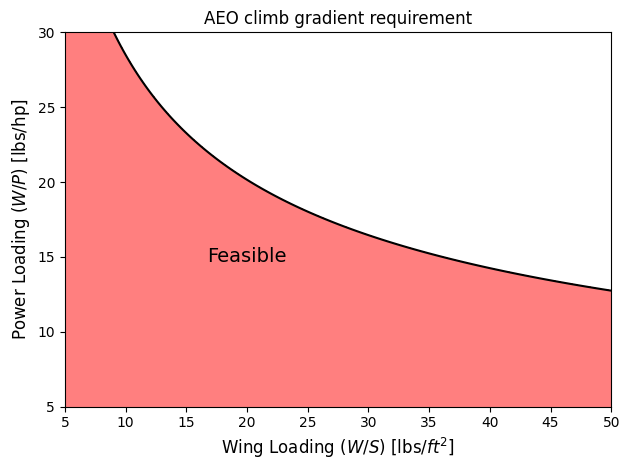

In [2]:
# Variables
cgr = 0.083
sigma = 1 # sea-level
CL = 1.6
CD0 = 0.043
e = 0.76
A = 8
n_p = 0.8
pto_by_pmax_cont = 1.1

CD = CD0 + CL**2/np.pi/A/e
L_by_D = CL / CD
cgrp_aeo = ( cgr + L_by_D**(-1) ) / CL**0.5

# W/S amd W/P values
num_pts = 500
wing_loading = np.linspace(5, 50, num_pts) # lb/ft^2
power_loading = np.linspace(5, 30, num_pts) # lb/hp
X, Y = np.meshgrid(wing_loading, power_loading)

cgr_aeo_req = Y * pto_by_pmax_cont * X**0.5 - 18.97 * n_p * sigma**0.5 / cgrp_aeo 

# Plotting
fs = 12 # fontsize

fig, ax = plt.subplots()
ax.contour(X, Y, cgr_aeo_req, colors="k", levels=[0])
ax.contourf(wing_loading, power_loading, cgr_aeo_req<=0, colors="r", levels=[0.5,1], alpha=0.5)
ax.annotate("Feasible", (20,15), fontsize=14, va="center", ha="center")
ax.set_xlabel("Wing Loading ($W/S$) [lbs/$ft^2$]", fontsize=fs)
ax.set_ylabel("Power Loading ($W/P$) [lbs/hp]", fontsize=fs)
ax.set_title("AEO climb gradient requirement")
ax.tick_params(axis='both', labelsize=fs-2)
plt.tight_layout()

## OEI requirement

Below table outlines required values for OEI requirement calculation:

<div style="width:75%; margin: auto;">

Parameter | Value | Source
------- | :------: | :-----:
CGR | $\geq$ 0.015 | 14 CFR Part 23
A | 8 | assumed, [check here](intro.md#values)
$\eta_p$ | 0.8 | assumed, [check here](intro.md#values)
$\sigma$ | 0.858 | at 5000 ft altitude
$C_L$ | 1.3 | $C_{L_{max}}$ at cruise (clean conf.) with 0.2 adjustment
$C_{D_0}$ | 0.033 | $C_{D_0}$ at cruise + stopped propeller
$e$ | 0.81 | $e$ at cruise
$P_{TO_{5000}}/P_{TO_{sea}}$ | 0.834 | Nicolai \& Carichner, Eq. 14.5

</div>

> **_NOTE_:** The weight $W$ is at the cruise which needs to be converted to takeoff conditions. The $W_{cruise}/W_{TO}$ is set to 0.975, assuming that an engine fails during the start of cruise phase.

> **_NOTE_:** The power is at 5,000 ft which needs to be converted to takeoff conditions (i.e. sealevel). Moreover, the power will be reduced by half since only one engine is operating. Hence, these two factors have to be take into account.

Below code plots climb gradient requirement for OEI scenario:

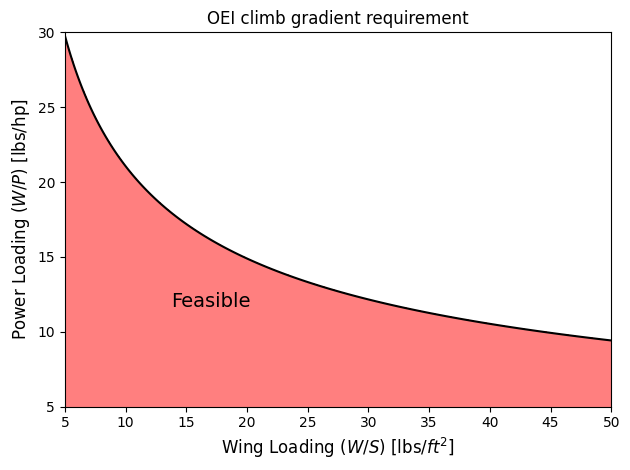

In [3]:
# Variables
cgr = 0.015
sigma = 0.858 # 5000 ft
CL = 1.3
CD0 = 0.028 + 0.005
e = 0.81
A = 8
n_p = 0.8
wcr_by_wto = 0.975
p5000_by_pTO = 0.834

CD = CD0 + CL**2/np.pi/A/e
L_by_D = CL / CD
cgrp_oei = ( cgr + L_by_D**(-1) ) / CL**0.5

# W/S amd W/P values
num_pts = 500
wing_loading = np.linspace(5, 50, num_pts) # lb/ft^2
power_loading = np.linspace(5, 30, num_pts) # lb/hp
X, Y = np.meshgrid(wing_loading, power_loading)

cgr_oei_req = Y * 2 / p5000_by_pTO * X**0.5 * wcr_by_wto**1.5 - 18.97 * n_p * sigma**0.5 / cgrp_oei 

# Plotting
fs = 12 # fontsize

fig, ax = plt.subplots()
ax.contour(X, Y, cgr_oei_req, colors="k", levels=[0])
ax.contourf(wing_loading, power_loading, cgr_oei_req<=0, colors="r", levels=[0.5,1], alpha=0.5)
ax.annotate("Feasible", (17,12), fontsize=14, va="center", ha="center")
ax.set_xlabel("Wing Loading ($W/S$) [lbs/$ft^2$]", fontsize=fs)
ax.set_ylabel("Power Loading ($W/P$) [lbs/hp]", fontsize=fs)
ax.set_title("OEI climb gradient requirement")
ax.tick_params(axis='both', labelsize=fs-2)
plt.tight_layout()

## BL Requirement

Below table outlines required values for BL requirement calculation:

<div style="width:70%; margin: auto;">

Parameter | Value | Source
------- | :------: | :-----:
CGR | $\geq$ 0.03 | 14 CFR Part 23
A | 8 | assumed, [check here](intro.md#values)
$\eta_p$ | 0.8 | assumed, [check here](intro.md#values)
$\sigma$ | 1 | landing at sea-level conditions
$C_L$ | 2.0 | $C_{L_{max}}$ at landing with 0.2 adjustment
$C_{D_0}$ | 0.113 | $C_{D_0}$ at cruise and Table 3.6 in Roskam Part 1
$e$ | 0.71 | $e$ at cruise and Table 3.6 in Roskam Part 1
</div>

> **_NOTE_:** For the BL scenario, the weight $W$ is at the landing which needs to be converted to takeoff conditions. The $W_{L}/W_{TO}$ is set to 0.975, assuming that airplane must return soon after takeoff and peforms blaked landing.

Below code plots climb gradient requirement for BL scenario:

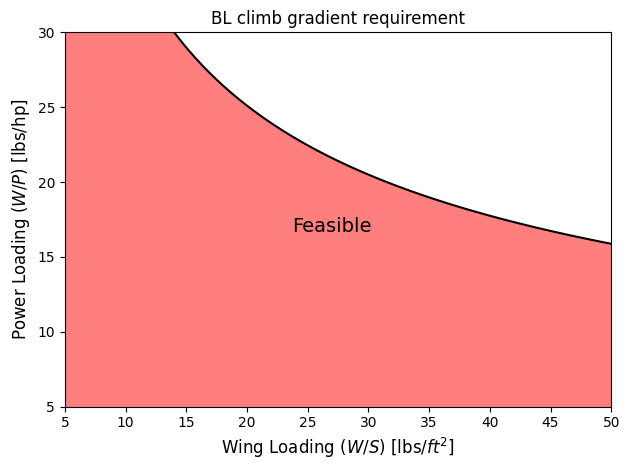

In [4]:
# Variables
cgr = 0.03
sigma = 1 # sea-level
CL = 2.0
CD0 = 0.113
e = 0.71
A = 8
n_p = 0.8
wl_by_wto = 0.975

CD = CD0 + CL**2/np.pi/A/e
L_by_D = CL / CD
cgrp_bl = ( cgr + L_by_D**(-1) ) / CL**0.5

# W/S amd W/P values
num_pts = 500
wing_loading = np.linspace(5, 50, num_pts) # lb/ft^2
power_loading = np.linspace(5, 30, num_pts) # lb/hp
X, Y = np.meshgrid(wing_loading, power_loading)

cgr_bl_req = Y * X**0.5 * wl_by_wto**1.5 - 18.97 * n_p * sigma**0.5 / cgrp_bl 

# Plotting
fs = 12 # fontsize

fig, ax = plt.subplots()
ax.contour(X, Y, cgr_bl_req, colors="k", levels=[0])
ax.contourf(wing_loading, power_loading, cgr_bl_req<=0, colors="r", levels=[0.5,1], alpha=0.5)
ax.annotate("Feasible", (27,17), fontsize=14, va="center", ha="center")
ax.set_xlabel("Wing Loading ($W/S$) [lbs/$ft^2$]", fontsize=fs)
ax.set_ylabel("Power Loading ($W/P$) [lbs/hp]", fontsize=fs)
ax.set_title("BL climb gradient requirement")
ax.tick_params(axis='both', labelsize=fs-2)
plt.tight_layout()

## Combining all three requirements

In this sub-section, all the three requirements are combined to determine the most crucial requirement for the example airplane.

Below code snippet plots the active constraint line for all the requirements and highlights the feasible region under all three conditions.

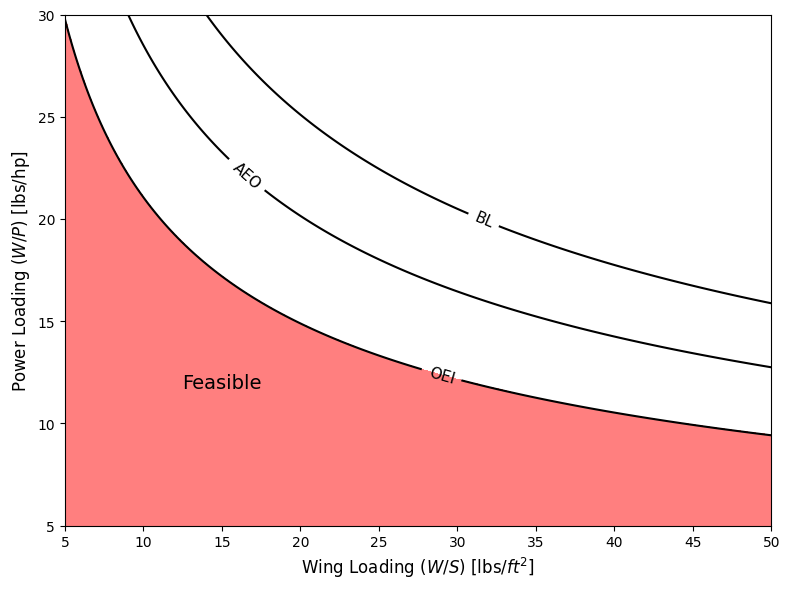

In [5]:
fig, ax = plt.subplots(figsize=(8,6))

cs = ax.contour(wing_loading, power_loading, cgr_aeo_req, colors="k", levels=[0])#, levels=[-1e-2,1e-2], label="Take-off")
ax.clabel(cs, fmt="AEO", fontsize=fs-1, manual=[(20,25)])

cs = ax.contour(wing_loading, power_loading, cgr_oei_req, colors="k", levels=[0])#, levels=[-1e-2,1e-2], label="Take-off")
ax.clabel(cs, fmt="OEI", fontsize=fs-1, manual=[(30,15)])

cs = ax.contour(wing_loading, power_loading, cgr_bl_req, colors="k", levels=[0])#, levels=[-1e-2,1e-2], label="Take-off")
ax.clabel(cs, fmt="BL", fontsize=fs-1, manual=[(30,17)])

feasible_region = np.logical_and(cgr_aeo_req <= 0, cgr_oei_req <= 0)
feasible_region = np.logical_and(feasible_region, cgr_bl_req <= 0)
ax.contourf(wing_loading, power_loading, feasible_region, colors="r", levels=[0.5,1], alpha=0.5)

ax.annotate("Feasible", (15,12), fontsize=14, va="center", ha="center")
ax.set_xlabel("Wing Loading ($W/S$) [lbs/$ft^2$]", fontsize=fs)
ax.set_ylabel("Power Loading ($W/P$) [lbs/hp]", fontsize=fs)
ax.tick_params(axis='both', labelsize=fs-2)
plt.tight_layout()
plt.show()

Based on the above figure, the climb gradient requirement in the OEI scenario is the driving constraint.